# oneEMITUniversity: Machine Learning in Python

In [6]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.text_cell').hide();
 } else {
 $('div.text_cell').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle the descriptions on/off."></form>''')

## Agenda 

- Introduction to Jupyter Notebook Environment
- Introduction to Pandas
- Introduction to Scikit-learn and Toy Datasets
- Machine Learning Example: Iris Dataset (K nearest neighbors)
- Machine Learning Example: Movie Review Classification (Natural Language Processing)

## Introduction to Jupyter Notebook

- Jupyter Notebook is an interactive IDE. Here we are using it with python.
- Cells with text in them are labeled Markdown. Cells with code in them are labeled Code. You can specify the label by using the pull down menu at the top. 
- All cells must be run and they must be run in order. If you get errors, go to 'Kernel' and select 'Restart & Run All.'
- To run one cell at a time, select it and push the play button at the top ribbon. You can also select the cell and push 'Shift+Enter'
- If you'd like to remove the textboxes so you can focus on the code, click the gray box above.
- If you'd just like to follow along, open 'final_copy.ipynb'
- If you'd like to write some of the code as we go, open 'student_copy.ipynb'

## Introduction to Pandas

We need data for our data science. Where can we get it? And once we have it, how do we manage it?

### Managing Data
Often, we'll wish to store our data in a tidy, clean dataframe structure. Rather than building this structure ourselves, we often leverage Pandas, "a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series." It is extremely useful and one of the most commonly used libraries in the data science world right now. Visit https://pandas.pydata.org/ for more information.

Let's take a quick look at what Pandas has to offer us.


In [7]:
# First, we import the relevant libraries.
import pandas as pd
import numpy as np

### Getting your data #1: Create a dataframe from scratch.
Let's create a new dataframe from scratch containing information about different animals.

In [3]:
# Here is our information about our different animals.
snoopy = ['Snoopy', 'White', 12,'Dog']
mrbusiness = ['Mr. Business','Orange', 6, 'Cat']
ed = ['Mr. Ed', 'Brown', 1000, 'Horse']
cera = ['Cera', 'Gray', 100, 'Triceratops']
lassie = ['Lassie','Brown', 20, 'Dog']
piglet = ['Piglet', 'Pink', 5,'Pig']
marvin = ['Marvin','Green',8, np.nan]

# Here we create our dataframe using our animal data. We also specify what each column refers to.
df = pd.DataFrame([snoopy, mrbusiness, ed, cera, lassie, piglet, marvin],columns=['Name','Color','Weight (lbs)','Species'])
print('This is the original dataframe:')
display(df)

This is the original dataframe:


,Name,Color,Weight (lbs),Species
0,Snoopy,White,12,Dog
1,Mr. Business,Orange,6,Cat
2,Mr. Ed,Brown,1000,Horse
3,Cera,Gray,100,Triceratops
4,Lassie,Brown,20,Dog
5,Piglet,Pink,5,Pig
6,Marvin,Green,8,NaN


### Getting your data #2: Import a dataframe from an external file. 
More often than not, you'll be reading in data from an external file. Often, csv, xlsx, or text files. Pandas makes this extremely easy with their "read_csv" and "read_excel" functions. Let's try it below.

In [4]:
# You can also read in information from csv, xlsx, txt files
excel_df = pd.read_excel('example_dataframe.xlsx')
excel_df

,Name,Age,Location
0,Albert,24,N1
1,Judy,30,N4
2,Tom,19,W3
3,Nancy,22,HL
4,Sid,27,S1


### Explore your data

In [206]:
# Generates descriptive statistics that summarize the central tendency, 
# dispersion and shape of a dataset’s distribution, excluding NaN values.
print('Descriptive statistical summary of the dataframe:')
display(df.describe())

Descriptive statistical summary of the dataframe:


,Weight (lbs)
count,7.000000
mean,164.428571
std,370.002638
min,5.000000
25%,7.000000
50%,12.000000
75%,60.000000
max,1000.000000


In [207]:
# Verify the shape of the dataframe
print('Shape of your dataframe: {}'.format(df.shape))
print('There are {} rows.'.format(df.shape[0]))
print('There are {} columns.'.format(df.shape[1]))

Shape of your dataframe: (7, 4)
There are 7 rows.
There are 4 columns.


In [208]:
# Look at the first 3 rows
print('These are the first three rows of the original dataframe:')
display(df.head(3))

# Look at the last 3 rows
print('These are the last three rows of the original dataframe:')
display(df.tail(3))

These are the first three rows of the original dataframe:


,Name,Color,Weight (lbs),Species
0,Snoopy,White,12,Dog
1,Mr. Business,Orange,6,Cat
2,Mr. Ed,Brown,1000,Horse


These are the last three rows of the original dataframe:


,Name,Color,Weight (lbs),Species
4,Lassie,Brown,20,Dog
5,Piglet,Pink,5,Pig
6,Marvin,Green,8,NaN


In [209]:
# look at a subset of your dataframe
print('Grab only the rows that where color is brown.')
display(df[df['Color'] == 'Brown'])

Grab only the rows that where color is brown.


,Name,Color,Weight (lbs),Species
2,Mr. Ed,Brown,1000,Horse
4,Lassie,Brown,20,Dog


In [210]:
# count the values in a certain column
print('How many of each value are there in the Species column?')
display(df['Species'].value_counts())

How many of each value are there in the Species column?


Dog            2
Pig            1
Horse          1
Cat            1
Triceratops    1
Name: Species, dtype: int64

In [211]:
# see if any values are null
print('Check how many null values are in each column')
display(df.isnull().sum())

Check how many null values are in each column


Name            0
Color           0
Weight (lbs)    0
Species         1
dtype: int64

## Introduction to Scikit-learn and Toy Datasets

### Scikit-learn
If you'd like, you can write all your own machine learning algorithms from scratch. However, most people leverage algorithms that have already been written by taking advantage of python's many different data science libraries. One such library is Scikit-learn. "Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, and k-means." Visit http://scikit-learn.org/stable/index.html for more information.

### Getting your data #3: Work with one of sklearn's toy datasets for a super quick start.

Another way to get started very quickly on your very own data science project is to leverage one of scikit-learn's toy datasets. See below for the full list. These standard datasets do not require you to download any file from some external website. While these datasets are useful for quickly testing the behavior of the various algorithms implemented in the scikit, they are often too small to be representative of real world machine learning tasks. Visit http://scikit-learn.org/stable/datasets/index.html for more information.

- load_boston():	Load and return the boston house-prices dataset (regression).
- load_iris():	Load and return the iris dataset (classification).
- load_diabetes():	Load and return the diabetes dataset (regression).
- load_digits():	Load and return the digits dataset (classification).
- load_linnerud():	Load and return the linnerud dataset (multivariate regression).
- load_wine():	Load and return the wine dataset (classification).
- load_breast_cancer():	Load and return the breast cancer wisconsin dataset (classification).
- load_sample_images():	Load sample images for image manipulation.



## These datasets allow us to experiment with many different types of analysis. Let's explore classification first.

### What is classification?

As humans, we use classification all the time. When you sort your laundry, you look for certain characteristics of each item to let you know whether you're holding a shirt, a pair of pants, socks, a dress, etc. With classification algorithms, we try to teach the machine to do the same.

Classification is the task of choosing the correct class label for a given input. With these algorithms, you take an existing dataset and use what you know about it to generate a predictive model for the classification of future data points. In basic classification tasks, the set of labels is known in advance. Some examples of classification tasks are:
- Is an email is spam or not?
- Which topic does a news article discuss: "sports," "technology," or "politics?" 
- Is Marvin a dog, cat, horse, or martian?


## Let's try our own classification problem.




### The Iris Dataset

This example follows https://github.com/amueller/introduction_to_ml_with_python/blob/master/01-introduction.ipynb.

Let's perform a classification problem using one of the toy datasets: the Iris dataset. The iris data set contains information about 3 different species of iris flowers and each species is represented by 50 examples. This gives us a total of 150 data points, each representing a unique iris flower. 

Each row of the dataset contains 4 pieces of information about each flower, namely its:

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 

#### Flower Education Break for the non-botanists in the room:

<img src='https://www.wpclipart.com/plants/diagrams/plant_parts/petal_sepal_label.png',width=200,height=200>

Let's see if we can identify what species a random iris is based only on these few physical characteristics (length and width of their petal and of their sepal).

#### What we want to predict: 
    - species of iris plant. 

#### What we know: 
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 

#### Based on this, can we predict the classification of other iris flowers? Let's find out.


### First let's load in and explore the iris dataset.

In [172]:
# First let's load the dataset
from sklearn.datasets import load_iris
iris_dataset = load_iris()

# These toy datasets have a  little bit of a unique format. Let's explore it briefly.
print("What's contained in the iris_dataset?")
print("Keys of iris_dataset: {}".format(iris_dataset.keys()))

What's contained in the iris_dataset?
Keys of iris_dataset: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [212]:
# Find out the different types of each piece of information.
print("Type of 'data' data: {}".format(type(iris_dataset['data'])))
print("Type of 'target' data: {}".format(type(iris_dataset['target'])))
print("Type of 'target_names' data: {}".format(type(iris_dataset['target_names'])))
print("Type of 'DESCR' data: {}".format(type(iris_dataset['DESCR'])))
print("Type of 'feature_names' data: {}".format(type(iris_dataset['feature_names'])))

Type of 'data' data: <class 'numpy.ndarray'>
Type of 'target' data: <class 'numpy.ndarray'>
Type of 'target_names' data: <class 'numpy.ndarray'>
Type of 'DESCR' data: <class 'str'>
Type of 'feature_names' data: <class 'list'>


In [213]:
print('Check the Iris Dataset Description for detailed info: \n')
print(iris_dataset['DESCR'][:970] + "\n...")

Check the Iris Dataset Description for detailed info: 

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====

### The "raw data" contains the information about the length and width of the petal and sepal.

In [173]:
# View the raw data.
print('What does the raw data look like? \n')
print("The shape of raw data is: {}".format(iris_dataset['data'].shape))
print("First five rows of data:\n{}\n".format(iris_dataset['data'][:5]))

# Find out the feature names.
print("What does each column refer to? Check the feature_names.")
print("Feature names:\n{}".format(iris_dataset['feature_names']))

What does the raw data look like? 

The shape of raw data is: (150, 4)
First five rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

What does each column refer to? Check the feature_names.
Feature names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### The "target data" contains the information about the species of the irises.

In [174]:
# View the target data.
print("What does the target data look like?\n")
print("The Shape of the target data: {}".format(iris_dataset['target'].shape))
print("The Target data:\n{}\n".format(iris_dataset['target']))

# Find out the target names.
print("Each row corresponds to one flower. Each flower has a type and so there is one target label for each row of data. \n")
print("What are the target names? {}".format(iris_dataset['target_names']))

What does the target data look like?

The Shape of the target data: (150,)
The Target data:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

Each row corresponds to one flower. Each flower has a type and so there is one target label for each row of data. 

What are the target names? ['setosa' 'versicolor' 'virginica']


### Put the iris data in a pandas dataframe for easy data manipulation!

In [194]:
# create dataframe from the iris data
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(iris_dataset['data'], columns=iris_dataset.feature_names)
display(iris_dataframe.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Let's visualize our data to start to increase our understanding of what we're working with.

Text(0,0.5,'petal length (cm)')

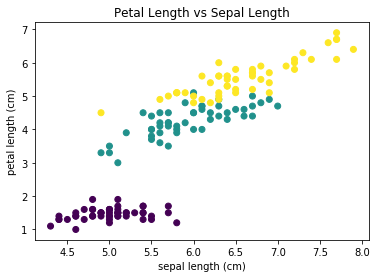

In [195]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot Sepal Length vs Petal Length
plt.scatter(iris_dataframe['sepal length (cm)'], iris_dataframe['petal length (cm)'], c=iris_dataset['target'])
plt.title("Petal Length vs Sepal Length")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')

Text(0,0.5,'petal width (cm)')

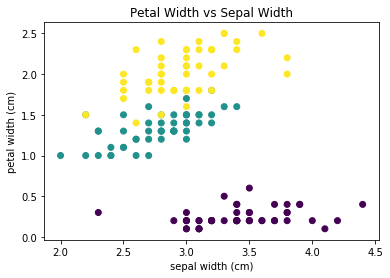

In [196]:
# Plot Sepal Width vs Petal Width
plt.scatter(iris_dataframe['sepal width (cm)'], iris_dataframe['petal width (cm)'], c=iris_dataset['target'])
plt.title("Petal Width vs Sepal Width")
plt.xlabel('sepal width (cm)')
plt.ylabel('petal width (cm)')

## Machine Learning Example: Classifying the Iris Dataset

### Now that we're more familiar with our data. Let's see if we can build a classification model that can predicts the species of an iris based on its petal/sepal length/width.

## Splitting into a Train Set / Test Set

We will need to give the algorithm some data to learn from. This will allow it to "study" the characteristics of the data in order to generate a predictive model. 

We also need a way to determine how well the predictive model is performing, meaning we need extra data to test the model with.
However, we are limited in the amount of data we have. We could wait and collect more data later, then feed it into the model, see how it performs, but it's probably a lot easier to simply reserve a portion of the data that we already have and use it for testing instead because it's very a reasonable assumption that the data we have today is a realistic representation of the data we expect to have in the future. 

So, before we get started, it is a simple solution to partion the data into two sets: a training set and a test set. The training set has a single and essential role mentioned above: it provides the raw material from which the predictive model is generated, while the test set is used to evaluate the performance of the model after it's created.

In [197]:
# Build training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

# X refers to our iris data
# y refers to our target data
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


## Let's choose our classification algorithm: K Nearest Neighbors (KNN)

### What is KNN? 
This example follows from https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/.

How does the algorithm work? How does the input parameter effect the output/prediction? KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry. 

The idea behind k-nearest neighbors is fairly simple, items are likely the same classification as those they are similar to in some way. Let’s look at a simple example to understand this algorithm. Below is a grouping of red circles (RC) and green squares (GS):

<img src='knn_1.PNG',width=500,height=500>

We want to decide what is the class of the blue star (BS). BS can either be RC or GS and nothing else. The “K” in KNN is a parameter. It is a parameter that indicates the number of the nearest neighbors we wish to take vote from. Let’s say K = 3. We want to find the 3 nearest neighbors of BS, which are circled in the image below:

<img src='knn_2.PNG',width=500,height=500>

We can see that the three closest points to BS are all RC. Therefore, in this case, we would label the class of BS as RC. While this example is very simplistic, it is often not this obvious, which makes the choice of the parameter K very crucial and influential over the results of this algorithm. There are different factors to be considered when choosing the parameter K and often, multiple values will be tested to understand its consequences.

We can implement a KNN model by following the below steps:

1. Load the data
2. Initialise the value of k
3. For getting the predicted class, iterate from 1 to total number of training data points
    1. Calculate the distance between test data and each row of training data. Here we will use Euclidean distance as our distance metric since it’s the most popular method. The other metrics that can be used are Chebyshev, cosine, etc.
    2. Sort the calculated distances in ascending order based on distance values
    3. Get top k rows from the sorted array
    4. Get the most frequent class of these rows
    5. Return the predicted class

In [198]:
# Lucky for us we don't have to implement the KNN algorithm from scratch. 
# These libraries have already done this for us!
# Let's import it.
from sklearn.neighbors import KNeighborsClassifier

# Initalize a KNN classifier for k=2
k = 2
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model using X as training data and y as target values
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

### Let's see what it  looks like to make a prediction on one random example. Create a new random example of an iris flower and see if we can predict what species it would be.

X_new.shape: (1, 4)
X_new: [[5.  2.9 1.  0.2]]


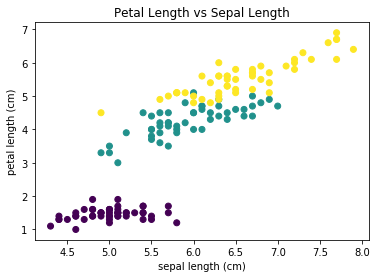

Text(0,0.5,'petal width (cm)')

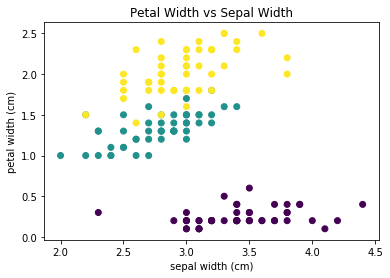

In [216]:
# Create a new example.
# This example would have a sepal length of 5 cm, sepal width of 2.9 cm, petal length of 1 cm, and petal width of 0.2 cm.
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))
print("X_new:", X_new)

# Plot Sepal Length vs Petal Length
plt.scatter(iris_dataframe['sepal length (cm)'], iris_dataframe['petal length (cm)'], c=iris_dataset['target'])
plt.title("Petal Length vs Sepal Length")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

# Plot Sepal Width vs Petal Width
plt.scatter(iris_dataframe['sepal width (cm)'], iris_dataframe['petal width (cm)'], c=iris_dataset['target'])
plt.title("Petal Width vs Sepal Width")
plt.xlabel('sepal width (cm)')
plt.ylabel('petal width (cm)')

### Predict a response for our new example.

In [200]:
# predict the response
prediction = knn.predict(X_new)
print("Prediction Class: {}".format(prediction))
print("Predicted target name: {}".format(
       iris_dataset['target_names'][prediction]))

Prediction Class: [0]
Predicted target name: ['setosa']


### Let's now make predictions on our entire test set and evaluate our accuracy.

In [201]:
y_pred = knn.predict(X_test)
print("We have {} test examples.".format(X_test.shape[0]))
print("The test set predictions:\n {}".format(y_pred))
print("The actual test set target values are:\n{}".format(y_test))

We have 38 test examples.
The test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
The actual test set target values are:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


### Let's evaluate the accuracy.

In [217]:
print("How many of the predictions are the same as the actual values?? How many are different??")
print(y_pred == y_test)

num_diff = len(y_pred) - (y_pred == y_test).sum()

print('You can see above that {} prediction(s) is/are incorrect.'.format(num_diff))

How many of the predictions are the same as the actual values?? How many are different??
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False]
You can see above that 1 prediction(s) is/are incorrect.


### Use knn.score to evaluate accuracy.

In [218]:
# Returns the mean accuracy on the given test data and labels.
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


## Machine Learning Example: Movie Review Classification (NLP)

This example leverages the Document Classification activity from Chapter 6 of Natural Language Processing with Python: https://www.nltk.org/book/ch06.html. There are many other exercises in the book we recommend.

 As with sklearn, nltk also provides some example datasets in its corpus.  One such example is a list of movie reviews.

In [ ]:
# Load the movie_reviews.
from nltk.corpus import movie_reviews

Let's store our movie reviews in a list. Each element of the list will store information about one review. We will have the review itself and also its corresponding category (either positive or negative).

In [ ]:
# Create a list of tuples where each tuple contains (the movie review, its corresponding category)
documents = [(list(movie_reviews.words(fileid)), category) \
             for category in movie_reviews.categories() for fileid in movie_reviews.fileids(category)]

Lets look at the first two examples of our reviews.

In [ ]:
# Example review 1
print("Let's look at our first review.")
print('The classification of this review is: {}'.format(documents[1][1]))
print('The Review Text:\n{}...'.format(" ".join(documents[1][0][:100])))
print('--------------------------------')
print('\n')

# Example review 2
print("Let's look at our second review.")
print('The classification of this review is: {}'.format(documents[2][1]))
print('The Review Text:\n{}...'.format(" ".join(documents[2][0][:100])))
print('--------------------------------')

The main idea here is to look at which words are contained in the review text and see if we can use that information to help us decide which class the review belongs to. For example, maybe if the review contains the word "amazing" 300 times, then the review is positive. What are the steps we need to take to accomplish this?
    - Make a list of all the words in the entire corpus. 
    - Count how many times each word appears in the corpus.
    - Sort the list from most frequently used word to least frequently used.
    - Select the top 2000 words.
    - For each document, count how many times each of these 2000 words appears.
        - Right now, each review is a series of sentences that we parse into meaningful messages as we read them. The machine cannot do this. It can't read in the same sense that we can. Instead, we'll get the machine to represent each document as a list of the words contained in the review as well as the frequency of each word. 
    - Separate the reviews into test set and train set.
    - Train/fit a Naive Bayes Classifier.
    - Test the model's accuracy. 

In [ ]:
# import random
# random.shuffle(documents)

import nltk

# Create a frequency dictionary with all the words 
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())

# Take the top 2000 most frequent words.
word_features = list(all_words)[:2000]

# Function to determine words in one specific review.
def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

# Create the review representations for each review.
featuresets = [(document_features(d), c) for (d,c) in documents]

simple explanation here: http://blog.aylien.com/naive-bayes-for-dummies-a-simple-explanation/

A classifier based on the Naive Bayes algorithm.  In order to find the
probability for a label, this algorithm first uses the Bayes rule to
express P(label|features) in terms of P(label) and P(features|label):

\begin{equation*}
P(\text{label | features}) = \frac{\text{P(label)}*\text{P(features | label)}}{\text{P(features)}}
\end{equation*}

The algorithm then makes the 'naive' assumption that all features are
independent, given the label:

\begin{equation*}
P(\text{label | features}) = \frac{\text{P(label)}*P(f_1\text{| label)}*...*P(f_n\text{| label})}{\text{P(features)}}
\end{equation*}

Rather than computing P(features) explicitly, the algorithm just
calculates the numerator for each label, and normalizes them so they
sum to one:

\begin{equation*}
P(\text{label | features}) = \frac{\text{P(label)}*P(f_1\text{| label)}*...*P(f_n\text{| label})}
{\sum_{l} P(l)*P(f_1|l)*...*P(f_n|l)}
\end{equation*}


In [ ]:
# Split the reviews into a training set and a test set.
train_set, test_set = featuresets[100:], featuresets[:100]

# Initalize and train our Naive Bayes Classifier. (Documentation at https://www.nltk.org/_modules/nltk/classify/naivebayes.html)
classifier = nltk.NaiveBayesClassifier.train(train_set)

# Evaluate the accuracy of the classifer on the test set.
print(nltk.classify.accuracy(classifier, test_set))

In [ ]:
# Let's take a look at one example:
review_features, classification = test_set[0]

print('The classification of this example review is: {}.'.format(classification))
for feature in list(review_features.keys())[:10]:
    print(feature, review_features[feature])

In [ ]:
# TODO: show results on one test example


What this tells you is the ratio of occurences in negative to positive, or visa versa, for every word. So here, we can see that the term "recognizes" appears 8.1 more times as often in positive reviews as it does in negative reviews. "Unimaginative" appears 7.8 more times as often in negative reviews as it does in positive reviews.

In [ ]:
# Determine the most relevant features, and display them.
classifier.show_most_informative_features(20)